In [ ]:
# Use ! to run a terminal command
! pip3 install wavio 
! pip3 install librosa
! pip3 install sounddevice
! pip3 install matplotlib==3.7.3

In [5]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import time

In [6]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

# Main function to record audio in mono and save to wav file
def record(path, sr):
    # Start audio recording
    recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) #record with a mono channel microphone
    
    # Record audio for the given duration
    print("Recording... " + path)
    sd.wait()

    # Write it to a file
    write(path,sr,recording)

    # Create discrete array from recording
    x, sr = librosa.load(path)
    print("recording shape", x.shape)
    print("sampling rate", sr)
    return x, sr 

def generate_time_plot(array, sr, plot_title):
    plt.figure(figsize=(14, 5))
    plt.title(plot_title + " Time Domain")
    plt.xlim(0, 5)
    librosa.display.waveshow(array, sr=sr)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

def generate_spectrogram(array, plot_title):
    
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(array)), ref=np.max)
    print(freq.shape)

    fig, ax = plt.subplots()
    plt.ylim(0,8000)
    plt.title(plot_title + " Spectrogram")
    img = librosa.display.specshow(freq, x_axis='time', y_axis='linear',ax=ax)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hertz)")
    fig.colorbar(img, ax=ax)

frank_samples = (0.1905 / 343) * sr # 7.5 inches, 0.1905 meters
perrin_samples = (0.1905/ 343) * sr
delay_avg = (frank_samples+perrin_samples)/2

def delay_array(array, delay, delay_name, attenuation, attenuation_name, sr):
    delete_elements = array[0:array.size-delay]
    pad_zeros = np.pad(delete_elements, (delay, 0), 'constant')
    delayed_array = np.hstack((array.reshape(-1,1), pad_zeros.reshape(-1, 1)*attenuation))
    if attenuation == 1:
        filename = "team[32]-stereosoundfile-[" + delay_name + "].wav"
    else:
        filename = "team[32]-stereosoundfile-[" + delay_name + "]-[" + attenuation_name + "].wav"
    write(filename, sr, delayed_array)

def generate_files(array, sr):
    delay_list = [0, round(delay_avg), round(0.001*sr), round(0.01*sr), round(0.1*sr)]
    delay_names = ["0ms", "avghead", "1ms", "10ms", "100ms"]
   
    for x in range(5):
        delay_array(array, delay_list[x], delay_names[x], 1, "", sr)

    attenuation_list = [0.7, 0.5, 0.25]
    attenuation_names = ["-1.5dB", "-3dB", "-6dB"]

    for x in range(3):
        delay_array(array, delay_list[0], delay_names[0], attenuation_list[x], attenuation_names[x], sr)
        delay_array(array, delay_list[1], delay_names[1], attenuation_list[x], attenuation_names[x], sr)


In [9]:
# Record the three phrases using record function
x1 , sr1 = record("quick_brown_fox.wav", sr)
print("Done!\n")
time.sleep(3) # pause 3 seconds between recordings
x2 , sr2 = record("antique_ivory_buckles.wav", sr)
print("Done!\n")
time.sleep(3) # pause 3 seconds between recordings
x3 , sr3 = record("exquisite_opal_jewels.wav", sr)
print("Done!\n")

Recording... quick_brown_fox.wav
recording shape (110250,)
sampling rate 22050
Done!

Recording... antique_ivory_buckles.wav
recording shape (110250,)
sampling rate 22050
Done!

Recording... exquisite_opal_jewels.wav
recording shape (110250,)
sampling rate 22050
Done!



In [10]:
# Play the audio
ipd.Audio(x1, rate=sr1) # load a NumPy array
ipd.Audio(x2, rate=sr2)
ipd.Audio(x3, rate=sr3)

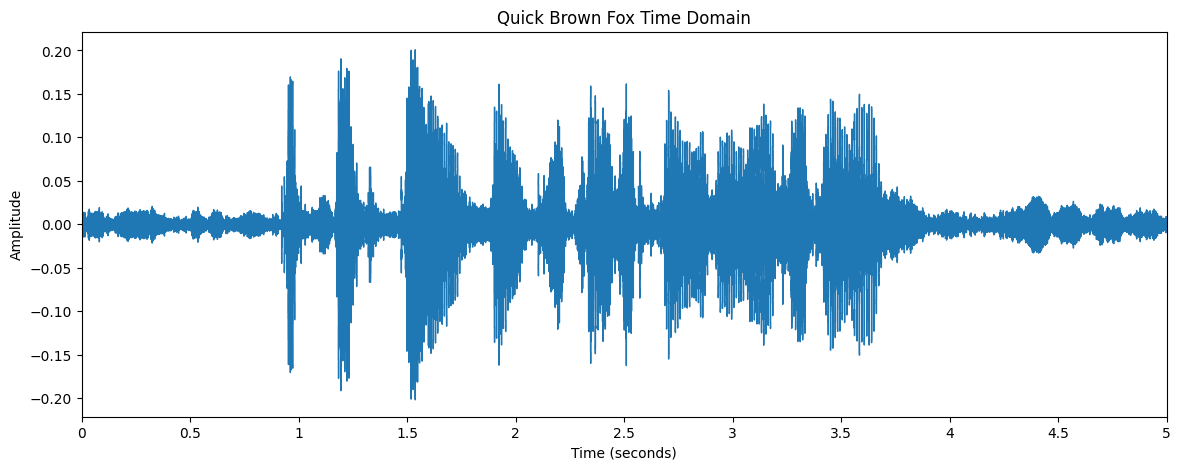

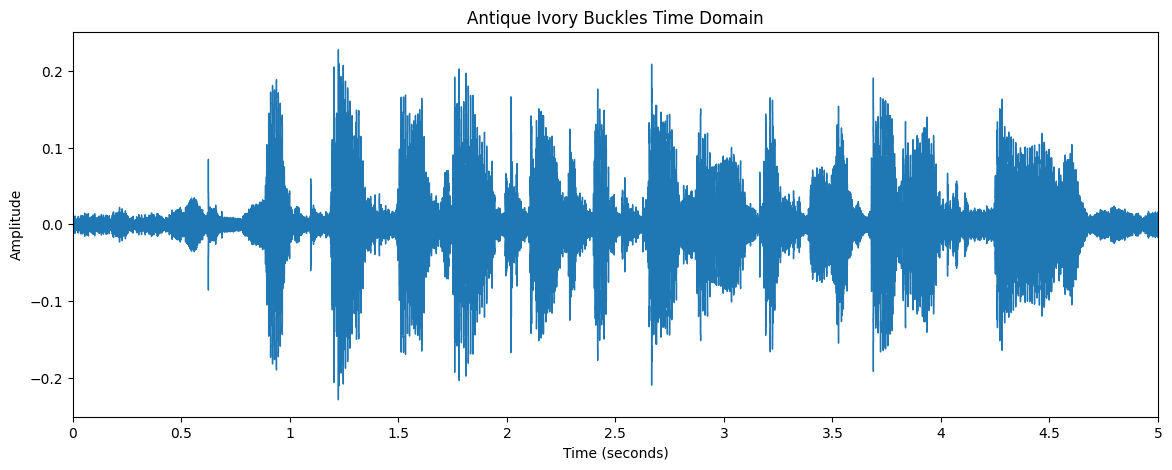

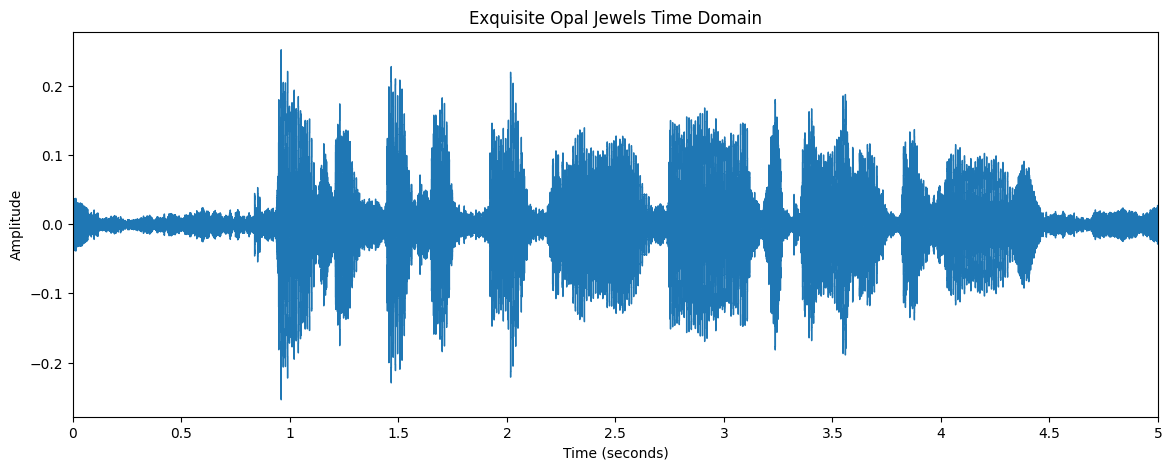

In [11]:
# Generate a Time Domain Plot for Each Recording
generate_time_plot(x1, sr1, "Quick Brown Fox")
generate_time_plot(x2, sr2, "Antique Ivory Buckles")
generate_time_plot(x3, sr3, "Exquisite Opal Jewels")

(1025, 216)
(1025, 216)
(1025, 216)


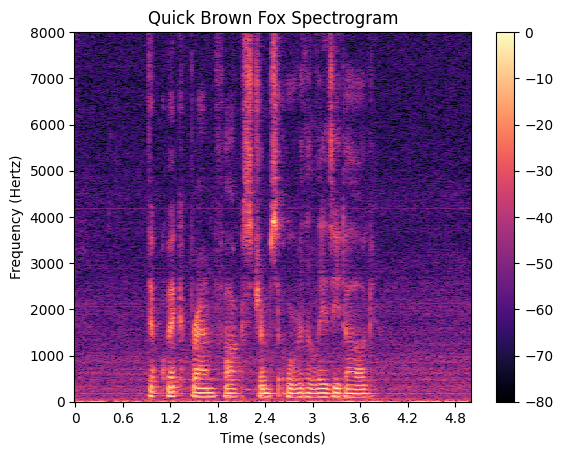

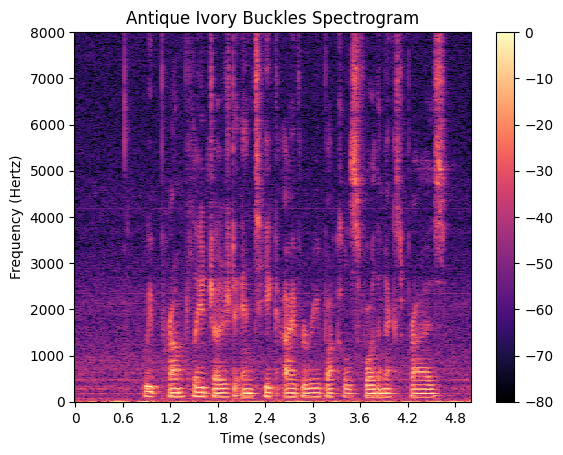

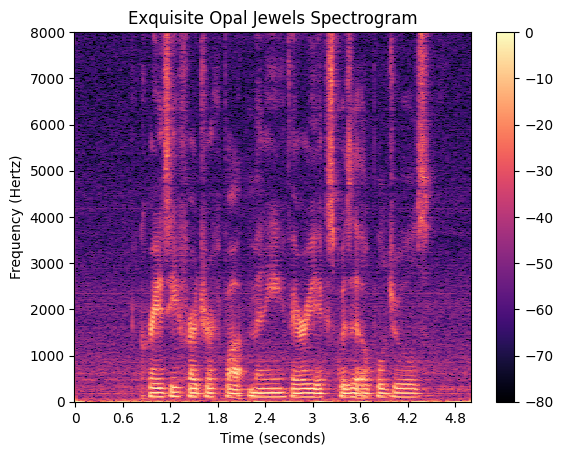

In [12]:
# Generate a Spectrogram for Each Recording
generate_spectrogram(x1, "Quick Brown Fox")
generate_spectrogram(x2, "Antique Ivory Buckles")
generate_spectrogram(x3, "Exquisite Opal Jewels")

In [13]:
# Generate delay and attenuated wav files for one of the phrases
generate_files(x1, sr1)